<a href="https://colab.research.google.com/github/Alpostros/MachineLearning/blob/master/Cat_vs_Dog_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

In [4]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')

In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as zipObj:
   zipObj.extractall()

with ZipFile('test.zip', 'r') as zipObj:
   zipObj.extractall()

In [0]:
img_width = 150
img_height = 150
TRAIN_DIR = '/content/train/'
TEST_DIR = '/content/test/'
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [0]:
train_images_dogs_cats.sort(key=natural_keys)
train_images_dogs_cats = train_images_dogs_cats[0:1300] + train_images_dogs_cats[12500:13800] 

test_images_dogs_cats.sort(key=natural_keys)

In [0]:
def prepare_data(list_of_images):
    x = [] #images
    y = [] #labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
            
    return x, y

In [0]:
X, Y = prepare_data(train_images_dogs_cats)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=101)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
batch_size = 16
train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [0]:
#Creating CNN
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

In [50]:
#Training
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = len(X_train) // batch_size,
    epochs = 60,
    validation_data = validation_generator,
    validation_steps = len(X_val) // batch_size
)
model.save('catvsdog-64x3.model')


Epoch 1/30
130/130 [==============================] - 13s 102ms/step - loss: 0.7228 - acc: 0.5159 - val_loss: 0.6935 - val_acc: 0.4902
Epoch 2/30
130/130 [==============================] - 12s 96ms/step - loss: 0.6992 - acc: 0.5548 - val_loss: 0.7857 - val_acc: 0.4902
Epoch 3/30
130/130 [==============================] - 12s 96ms/step - loss: 0.6720 - acc: 0.5904 - val_loss: 0.6397 - val_acc: 0.6875
Epoch 4/30
130/130 [==============================] - 12s 96ms/step - loss: 0.6298 - acc: 0.6452 - val_loss: 0.6272 - val_acc: 0.6484
Epoch 5/30
130/130 [==============================] - 12s 96ms/step - loss: 0.6176 - acc: 0.6726 - val_loss: 0.6094 - val_acc: 0.6953
Epoch 6/30
130/130 [==============================] - 12s 96ms/step - loss: 0.6035 - acc: 0.6784 - val_loss: 0.5913 - val_acc: 0.6914
Epoch 7/30
130/130 [==============================] - 12s 93ms/step - loss: 0.5953 - acc: 0.7053 - val_loss: 0.5717 - val_acc: 0.7148
Epoch 8/30
130/130 [==============================] - 12s 94m

In [61]:
#loading previously saved model from drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#model = tf.keras.models.load_model("/content/drive/My Drive/catvsdog-64x3.model")
model.summary()

In [59]:
X_test, Y_test = prepare_data(test_images_dogs_cats)
test_datagen = ImageDataGenerator(
    rescale= 1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
print(Y_test)

[]


In [0]:
batch_size = 16
test_generator = test_datagen.flow(np.array(X_test), batch_size=batch_size)

In [55]:
prediction_probabilities = model.predict_generator(test_generator, verbose=1)

782/782 [==============================] - 63s 80ms/step


12500
0


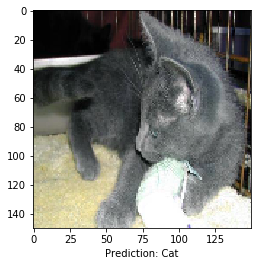

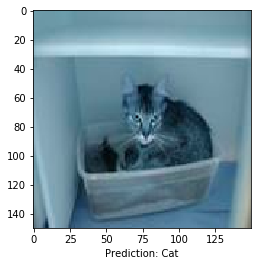

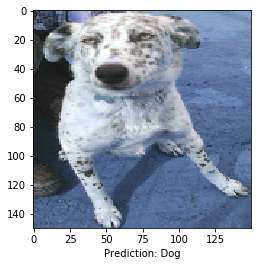

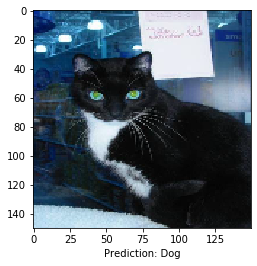

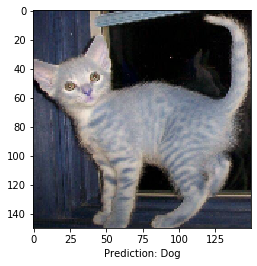

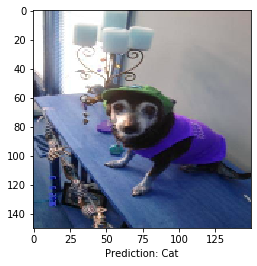

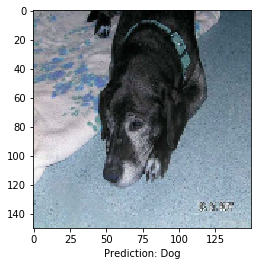

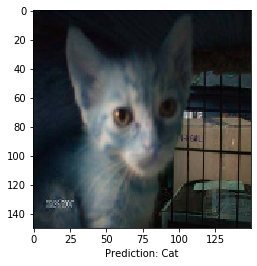

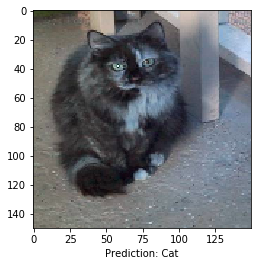

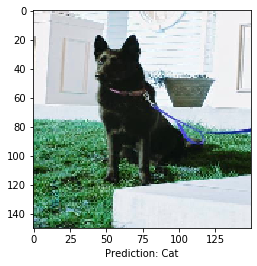

In [60]:
class_names = ['Cat', 'Dog']
test_images = np.array(X_test)
print(len(test_images))
test_labels = np.array(Y_test)
size = len(prediction_probabilities)
print(len(test_labels))
class_array = []
for i in range(size):
    if(prediction_probabilities[i]>0.5):
      class_array.append(0)
    else:
      class_array.append(1)

class_array = np.array(class_array)
checknum = 99 # used as index for random img check, must be > 0
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i+checknum], cmap='gray')
    #plt.title("Actual: " + Y_test[i])
    plt.xlabel("Prediction: " + class_names[class_array[i+checknum]])
    plt.show()
